In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import warnings
# Dependency imports
#from absl import flags
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy as np
import pickle 
warnings.simplefilter(action="ignore")
import statistics
#from plots import tsplotseveralacc, tsplotseveralloss

In [2]:
losses = 'results/SIGMOID/'
with open (losses+'result_adabound_b128/Decay_False_lr0.001_no1_b128_adabound', 'rb') as fp:
    adabound = pickle.load(fp)
with open (losses+'result_adam_b128/Decay_False_lr0.0001_no1_b128_adam', 'rb') as fp:
    adam = pickle.load(fp)
with open (losses+'result_padam_b128/Decay_False_lr0.01_no1_b128_padam', 'rb') as fp:
    padam = pickle.load(fp)

In [2]:
losses = 'results/SIGMOID/'
with open (losses+'result_adabound_b128/Decay_False_lr0.001_no1_b128_adabound', 'rb') as fp:
    adabound = pickle.load(fp)
with open (losses+'result_adam_b128/Decay_False_lr0.0001_no1_b128_adam', 'rb') as fp:
    adam = pickle.load(fp)
with open (losses+'result_padam_b128/Decay_False_lr0.01_no1_b128_padam', 'rb') as fp:
    padam = pickle.load(fp)
with open (losses+'result_adagrad_b128/Decay_False_lr0.01_no1_b128_adagrad', 'rb') as fp:
    adagrad = pickle.load(fp)
with open (losses+'result_sagd_b128/Decay_False_lr0.1_no1_b128_sagd', 'rb') as fp:
    sagd = pickle.load(fp)
with open (losses+'result_sgd_b20/Decay_False_lr0.1_no1_b20_sgd', 'rb') as fp:
    sgd = pickle.load(fp)
with open (losses+'result_SARMSprop_b128/Decay_False_lr0.0001_no1_b128_SARMSprop', 'rb') as fp:
    rmsprop = pickle.load(fp)

# TEST ACCURACIES

In [3]:
adaboundacc = list(map(list, zip(*adabound['test_accs'])))
adamacc = list(map(list, zip(*adam['test_accs'])))
padamacc = list(map(list, zip(*padam['test_accs'])))
adagradacc = list(map(list, zip(*adagrad['test_accs'])))
sagdacc = list(map(list, zip(*sagd['test_accs'])))
sgdacc = list(map(list, zip(*sgd['test_accs'])))
rmspropacc = list(map(list, zip(*rmsprop['test_accs'])))

In [5]:
np.mean(sagdacc, axis=0)

array([62.34 , 83.266, 86.68 , 88.328, 92.572, 95.316, 96.832, 98.024])

In [7]:
np.var(sagdacc, axis=0)

array([1.487804e+01, 1.122640e-01, 2.136800e-01, 7.428160e-01,
       2.369600e-02, 6.602400e-02, 6.256000e-03, 2.144000e-03])

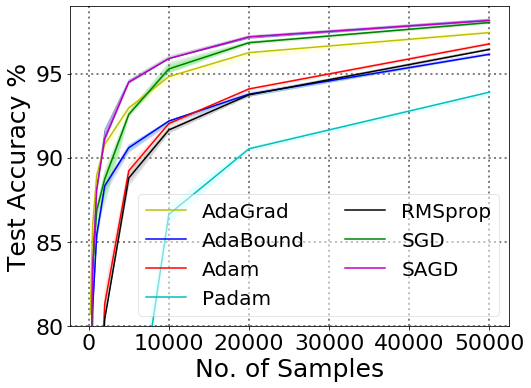

In [5]:
def tsplotseveralacc(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','r','c','black','g','m']
    colors=['lightyellow','lightskyblue','mistyrose','lightcyan','lightgrey','lightgreen', 'blueviolet']
    labels= ['AdaGrad', 'AdaBound', 'Adam', 'Padam', 'RMSprop', 'SGD', 'SAGD']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=2)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('No. of Samples', fontsize=axis_fontsize)
    plt.ylabel('Test Accuracy %', fontsize=axis_fontsize)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.ylim(top=99) 
    plt.ylim(bottom=80)
    plt.grid(linestyle='dotted',linewidth=2)
    plt.locator_params(axis="both", integer=True, tight=True)
    #pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,2))
    fig.tight_layout()
    #fig.show()
    fig.savefig("figures/sigmoid/testaccsigmoid.png",bbox_inches = 'tight')
    

iterations = len(adaboundacc)
itera = [200, 500, 1000, 2000, 5000, 10000, 20000,50000]
#itera = np.linspace(0,iterations,iterations)
figsize = (7.5, 5.5)
leg_fontsize= 20
axis_fontsize = 25
toplot = [adagradacc,adaboundacc, adamacc, padamacc,rmspropacc,sagdacc, sgdacc]
tsplotseveralacc(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

In [5]:
dir_ = '/Users/karimimohammedbelhal/Desktop/sagd_data_withvar/MNIST/SIGMOID/'
np.savetxt(dir_+'adagrad'+'_acc.txt', adagradacc,delimiter="\n", fmt="%s")
np.savetxt(dir_+'adabound'+'_acc.txt', adaboundacc,delimiter="\n", fmt="%s")
np.savetxt(dir_+'adam'+'_acc.txt', adamacc,delimiter="\n", fmt="%s")
np.savetxt(dir_+'padam'+'_acc.txt', padamacc,delimiter="\n", fmt="%s")
np.savetxt(dir_+'rmsprop'+'_acc.txt', rmspropacc,delimiter="\n", fmt="%s")
np.savetxt(dir_+'sgd'+'_acc.txt', sgdacc,delimiter="\n", fmt="%s")
np.savetxt(dir_+'sagd'+'_acc.txt', sagdacc,delimiter="\n", fmt="%s")

np.savetxt(dir_+'adagrad'+'_loss.txt', adagradloss,delimiter="\n", fmt="%s")
np.savetxt(dir_+'adabound'+'_loss.txt', adaboundloss,delimiter="\n", fmt="%s")
np.savetxt(dir_+'adam'+'_loss.txt', adamloss,delimiter="\n", fmt="%s")
np.savetxt(dir_+'padam'+'_loss.txt', padamloss,delimiter="\n", fmt="%s")
np.savetxt(dir_+'rmsprop'+'_loss.txt', rmsproploss,delimiter="\n", fmt="%s")
np.savetxt(dir_+'sgd'+'_loss.txt', sgdloss,delimiter="\n", fmt="%s")
np.savetxt(dir_+'sagd'+'_loss.txt', sagdloss,delimiter="\n", fmt="%s")

In [11]:
dir_ = '/Users/karimimohammedbelhal/Desktop/sagdplots_data/MNIST/SIGMOID/'
np.savetxt(dir_+'adagrad'+'_acc.txt', np.mean(adagradacc,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'adabound'+'_acc.txt', np.mean(adaboundacc,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'adam'+'_acc.txt', np.mean(adamacc,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'padam'+'_acc.txt', np.mean(padamacc,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'rmsprop'+'_acc.txt', np.mean(rmspropacc,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'sgd'+'_acc.txt', np.mean(sgdacc,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'sagd'+'_acc.txt', np.mean(sagdacc,axis=0), delimiter="\n", fmt="%s")

dir_ = '/Users/karimimohammedbelhal/Desktop/sagdplots_data/MNIST/SIGMOID/'
np.savetxt(dir_+'adagrad'+'_loss.txt', np.mean(adagradloss,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'adabound'+'_loss.txt', np.mean(adaboundloss,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'adam'+'_loss.txt', np.mean(adamloss,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'padam'+'_loss.txt', np.mean(padamloss,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'rmsprop'+'_loss.txt', np.mean(rmsproploss,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'sgd'+'_loss.txt', np.mean(sgdloss,axis=0), delimiter="\n", fmt="%s")
np.savetxt(dir_+'sagd'+'_loss.txt', np.mean(sagdloss,axis=0), delimiter="\n", fmt="%s")

# TEST LOSSES

In [4]:
adaboundloss = list(map(list, zip(*adabound['test_losses'])))
adamloss = list(map(list, zip(*adam['test_losses'])))
padamloss = list(map(list, zip(*padam['test_losses'])))
adagradloss = list(map(list, zip(*adagrad['test_losses'])))
sagdloss = list(map(list, zip(*sagd['test_losses'])))
sgdloss = list(map(list, zip(*sgd['test_losses'])))
rmsproploss = list(map(list, zip(*rmsprop['test_losses'])))

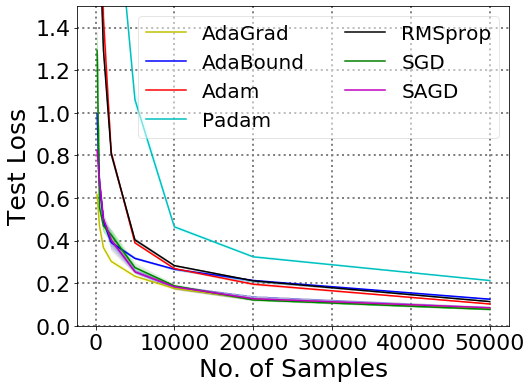

In [7]:
def tsplotseveralloss(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','r','c','black','g','m']
    colors=['lightyellow','lightskyblue','mistyrose','lightcyan','lightgrey','lightgreen', 'blueviolet']
    labels= ['AdaGrad', 'AdaBound', 'Adam', 'Padam', 'RMSprop', 'SGD', 'SAGD']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=2)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('No. of Samples', fontsize=axis_fontsize)
    plt.ylabel('Test Loss', fontsize=axis_fontsize)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.ylim(top=1.5) 
    plt.ylim(bottom=0)
    plt.grid(linestyle='dotted',linewidth=2)
    pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4))
    fig.tight_layout()
    fig.savefig("figures/sigmoid/testlosssigmoid.png",bbox_inches = 'tight')
    
iterations = len(adaboundloss)
itera = [200, 500, 1000, 2000, 5000, 10000, 20000,50000]
#itera = np.linspace(0,iterations,iterations)
figsize = (7.5, 5.5)
leg_fontsize= 20
axis_fontsize = 25
toplot = [adagradloss,adaboundloss, adamloss, padamloss,rmsproploss,sagdloss, sgdloss]
tsplotseveralloss(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')